# <center> CS  4783/5783
# <center> Fall 2022
# <center> Assignment 5 – Classifier(Naïve Bayes, Decision tree) 
# <center> Due: 11/28/2022 11:59 pm
# <center> Submitted By: Haridas Das

# Code Compile

Click Runtime --> Restart Runtime

This will clear out all variables from memory and let you start over.

# Problem 1
Consider the following data about the possible taste of a particular fruit based on some visual characteristics.

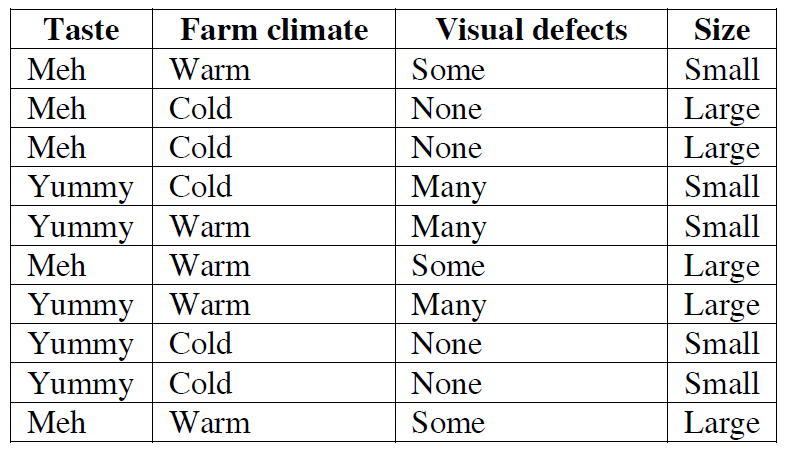

1. Answer the following questions based on your understanding of decision trees and Naïve Bayes.

# [Question 1] 

Support you want to build a decision tree. What is the initial entropy of the target variable taste?

# Solution # 1

we want to compute the initial entropy of the target variable taste. 
We know the entropy $H(Y)=- \sum_{i=1}^{k} P(Y=y_i) log_2 P(Y=y_i)$.

P(Taste=Meh)= $\frac{5}{10}=\frac{1}{2}$

P(Taste=Yummy)= $\frac{5}{10}=\frac{1}{2}$

$H(Y)=- \sum_{i=1}^{k} P(Y=y_i) log_2 P(Y=y_i)=-\frac{1}{2} log_2 (\frac{1}{2})-\frac{1}{2}log_2 (\frac{1}{2})=-log_2 (\frac{1}{2})=-(log_2 (1)-log_2 (2))=-(0-1)=1$

# [Question 2]

Consider that the variable Visual defects is chosen as the root of the decision tree. What is the information
gain of the decision tree?

# Solution # 2

Let the variable Visual defects be $X_2$. Suppose the variable $X_2$ is chosen as the root of the decision tree. We want to compute the information
gain of the decision tree, where 

$IG(X)= H(Y)-H(Y|X)$.

Here $H(Y|X)=- \sum_{j=1}^{v}  P(X=x_j) \sum_{i=1}^{k} P(Y=y_i| X=x_j) log_2 P(Y=y_i | X=x_j)$

Some: 1+1+1=3
None:1+1+1+1= 4
Many:1+1+1=3

P(Visual defects=Some)= $\frac{3}{10}$

P(Visual defects=None)= $\frac{4}{10}$

P(Visual defects=Many)= $\frac{3}{10}$

Now, $H(Y|X_2)=- P(Visual ~ defects=Some) \sum_{i=1}^{k} P(Y=y_i| X=x_j) log_2 P(Y=y_i | X=x_j) - P(Visual~ defects=None) \sum_{i=1}^{k} P(Y=y_i| X=x_j) log_2 P(Y=y_i | X=x_j) - P(Visual~ defects=Many) \sum_{i=1}^{k} P(Y=y_i| X=x_j) log_2 P(Y=y_i | X=x_j)$

Now, $H(Y|X_2)= - \frac{3}{10} (1* log_2 1 +0 log_2 0) - \frac{3}{10} (1 *log_2 1 +0 log_2 0)- \frac{4}{10} ((\frac{1}{2}) log_2 (\frac{1}{2}) +(\frac{1}{2}) log_2 (\frac{1}{2}))= -\frac{4}{10} (  log_2 (\frac{1}{2}) )=-\frac{4}{10} (  log_2 (1)-log_2 (2) )=-\frac{4}{10} (0-1)=\frac{4}{10}=0.4 $

$IG(X)= H(Y)-H(Y|X)= 1-.4=0.6$.

# [Question 3] 

What is entropy H(Taste|Visual Defect == Some) and the entropy H(Taste|Visual Defect == None)?

# Solution of Question 3: 

First from the Taste column we obtain, 

P(Taste=Meh)= $\frac{5}{10}=\frac{1}{2}$, and 

P(Taste=Yummy)= $\frac{5}{10}=\frac{1}{2}.$

Also from the Visual defects column we get

Some: 1+1+1=3
None:1+1+1+1= 4
Many:1+1+1=3. 

P(Taste| Visual defects=Some)= $\frac{3}{10}$

P(Taste| Visual defects=None)= $\frac{4}{10}$

Entripy, H(Taste| Visual defects=Some)= $-(1 *log _2 (1)+0* ;og_2 (0))=0$

H(Taste| Visual defects=None)= $-((\frac{1}{2}) *log _2 (\frac{1}{2})+(\frac{1}{2})* og_2 (\frac{1}{2}))=-(log _2 (\frac{1}{2}) )=-(log _2 (1)-log _2 (2) )=1$

# [Question 4] 

In this question, you will be using k-means to perform image compression. Implement a naïve version of the k-means algorithm based on your understanding. Your code must take the number of clusters k as input and perform k-means clustering on the given image. Once the algorithm finishes running, the cluster
centroids represent the top-k common colors in the image. Iterate through each pixel in the image and assign the closest color to each pixel. Save and visualize the resulting image. For reading and writing images, you
can use OpenCV, which is an open-source computer vision toolkit. The following code will load the image into a NumPy array. You can use this as input to your K-Means algorithm.

import cv2

img = cv2.imread(‘input.png’)

height, width, channels = np.shape(img)

for i in width:

for j in height:

pixel = img[j][i] # Read the pixel at location (i,j)

img[j][i] = newValue # Assign a new value to the pixel

# Note: You cannot use any library for k-means. You can only use OpenCV or other equivalent library
to load images.

# Slution of Problem 4

In [30]:
# Load Drive and mount
from google.colab import drive 
#load mounting drive to access the files on the google MyDrive. 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import matplotlib.pyplot as plt  # Ploting MATLAB like routines
import numpy as np
import pandas as pd

In [32]:
import cv2
# loading the png image as a 3d matrix 
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment5/input.png')
height, width, channels = np.shape(img)
print('height of the input image is ', height)
print('height of the input image is ', width)

height of the input image is  128
height of the input image is  128


This function chooses K data points at random for K centroids. After randomly selecting K data points from the train set, it returns K initial centroids.

In [33]:
def initialize_rand_centroids(X,K):
    points = np.reshape(X, (X.shape[0] * X.shape[1],X.shape[2]))
    print('points.shape',points.shape)
    m, n = points.shape
    
    centroid = np.zeros((K, n))
    centroids=[]
    for i in range(K):
        centroid[i,0] = points[np.random.choice(range(8)),0]
        centroid[i,1] = points[np.random.choice(range(10)),1]
        centroids.append(centroid)
    return points, centroid

This function calculates the Euclidian distance from each centroid and returns the closest centroid id.

In [34]:
# Function to measure the euclidean distance (distance formula)
def cal_eucidian_distance(x1,y1, x2,y2):
    d = np.square(x1 - x2) + np.square(y1 - y2)
    d = np.sqrt(d)
    return d

This function updates the cluster centroid positions as the average of the features in the same cluster.

In [35]:
def update_centroids(points, centroids, cluserpoints, k):
    sumx = 0
    sumy = 0
    count = 0
             
    for j in range(len(points)):
                  
        if(cluserpoints[j] == k):
            sumx += points[j, 0]
            sumy += points[j, 1]
            count += 1
              
    if(count == 0):
        count = 1    
              
    centroids[k,0] = float(sumx / count)
    centroids[k,1] = float(sumy / count)
    return centroids

In [36]:
def k_means(points, centroids, clusters):
  
    iterations = 10 # the number of iterations 
    m, n = points.shape
      
    # these are the index values that
    # correspond to the cluster to
    # which each pixel belongs to.
    cluserpoints = np.zeros(m) 
  
    # k-means algorithm.
    for i in range(iterations):
  
        for j in range(len(points)):
              
            # initialize minimum value to a large value
            minv = 1000000
            temp = None
              
            for k in range(clusters):
                x1 = points[j, 0]
                y1 = points[j, 1]
                x2 = centroids[k, 0]
                y2 = centroids[k, 1]
                
                if(cal_eucidian_distance(x1, y1, x2, y2) < minv):         
                    minv = cal_eucidian_distance(x1, y1, x2, y2)
                    cluserpoints[j] = k
                
          
        for k in range(clusters):
            centroids = update_centroids(points, centroids, cluserpoints, k)
  
    return centroids, cluserpoints

In [37]:
def image_compression(centroids, cluserpoints, img):
  
    # assigning each pixel to its corresponding centroid.
    cluserpoints=cluserpoints.astype(int)
    reassignedPixels = centroids[cluserpoints, :]
      
    # getting back the 3d matrix (row, col, rgb(3))
    reassignedPixels = np.reshape(reassignedPixels, (img.shape[0], img.shape[1],
                                                     img.shape[2]))
  
    # plotting the compressed image.
    plt.imshow(reassignedPixels)
    plt.show()

In [11]:
import imageio
import cv2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
# from scipy.io import loadmat
from scipy import misc

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CS 5783 ML/Assignment5/input.png')
img=img/255 # normalize by dividing by maximum number 

In [38]:
#normalize it so that the values are small
img=img/255 # normalize by dividing by maximum number 

points.shape (16384, 3)
[[0.44705882 0.73333333 0.        ]]


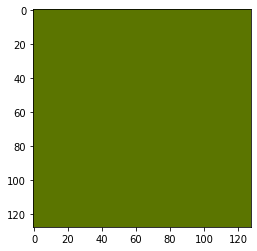

In [39]:
# Choosing one color as K=1 
K=1
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.44705882 0.6745098  0.        ]
 [0.43137255 0.70196078 0.        ]]


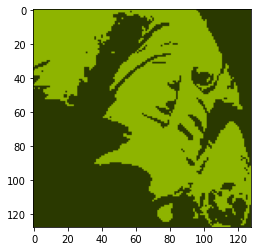

In [40]:
# Choosing two colors as K=2
K=2
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.43137255 0.7254902  0.        ]
 [0.43137255 0.70588235 0.        ]
 [0.44705882 0.73333333 0.        ]]


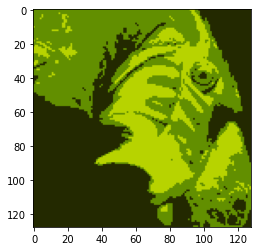

In [41]:
# Choosing three K=3
K=3
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.44705882 0.70196078 0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.44705882 0.7254902  0.        ]]


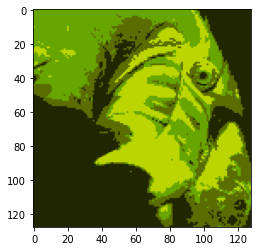

In [16]:
# Choosing four colors as K=4
K=4
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.40392157 0.71764706 0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]]


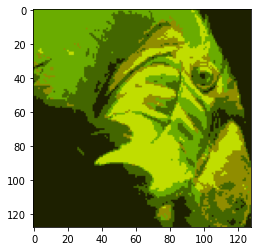

In [17]:
# Choosing five colors as K=5
K=5
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.45490196 0.7254902  0.        ]
 [0.45490196 0.72941176 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.43529412 0.71764706 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.43137255 0.7254902  0.        ]]


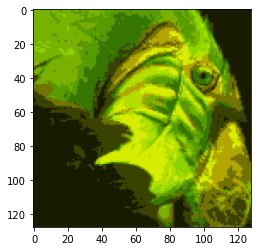

In [18]:
# Choosing ten colors as K=10
K=10
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.44705882 0.72941176 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.43137255 0.6745098  0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.44705882 0.70588235 0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.41176471 0.7254902  0.        ]]


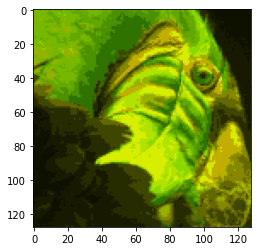

In [19]:
# Choosing fifteen colors as K=15
K=15
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.45490196 0.73333333 0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.43137255 0.6745098  0.        ]
 [0.41176471 0.71764706 0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.40392157 0.70196078 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.45098039 0.72941176 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.43137255 0.73333333 0.        ]]


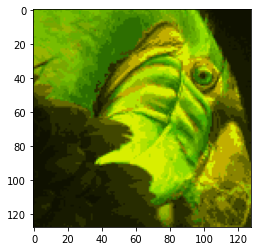

In [20]:
# Choosing twenty colors as K=20
K=20
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.43529412 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.43529412 0.71764706 0.        ]
 [0.44705882 0.71764706 0.        ]
 [0.45098039 0.70588235 0.        ]
 [0.41176471 0.70196078 0.        ]
 [0.45490196 0.6745098  0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.41176471 0.6745098  0.        ]
 [0.44705882 0.73333333 0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.45490196 0.70196078 0.        ]
 [0.45098039 0.6745098  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.41176471 0.72941176 0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.41176471 0.72941176 0.        ]
 [0.41176471 0.73333333 0.        ]]


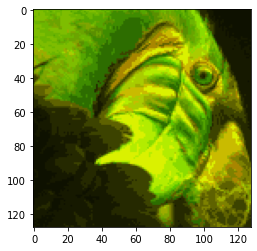

In [21]:
# Choosing thwenty five colors as K=25
K=25
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.45098039 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.45490196 0.71764706 0.        ]
 [0.45098039 0.71764706 0.        ]
 [0.45490196 0.70196078 0.        ]
 [0.41176471 0.7254902  0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.43529412 0.70196078 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.44705882 0.6745098  0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.44705882 0.72941176 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45490196 0.6745098  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.43137255 0.6745098  0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.

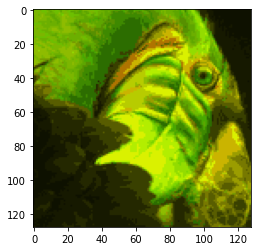

In [22]:
# Choosing thirt colors as K=30
K=30
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.43137255 0.70588235 0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.41176471 0.6745098  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.43529412 0.70588235 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.45098039 0.71764706 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.41176471 0.6745098  0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.45490196 0.70196078 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.43137255 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.44705882 0.72941176 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.43137255 0.72941176 0.        ]
 [0.41176471 0.7254902  0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.

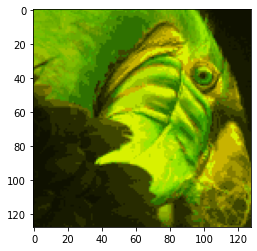

In [23]:
# Choosing thirty two colors as K=32
K=32
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.40392157 0.70196078 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.41176471 0.70588235 0.        ]
 [0.45098039 0.70588235 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.45098039 0.72941176 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.45098039 0.71764706 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.44705882 0.72941176 0.        ]
 [0.45098039 0.6745098  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.41176471 0.71764706 0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.44705882 0.70588235 0.        ]
 [0.41176471 0.70588235 0.        ]
 [0.45490196 0.6745098  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.41176471 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.43137255 0.70588235 0.        ]
 [0.

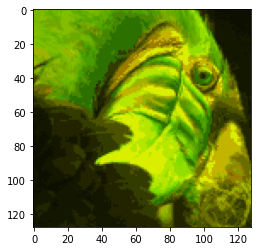

In [24]:
# Choosing thirty five colors as K=35
K=35
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.41176471 0.70196078 0.        ]
 [0.41176471 0.70196078 0.        ]
 [0.45490196 0.6745098  0.        ]
 [0.43529412 0.72941176 0.        ]
 [0.41176471 0.70588235 0.        ]
 [0.41176471 0.6745098  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.41176471 0.70196078 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.44705882 0.6745098  0.        ]
 [0.41176471 0.7254902  0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45098039 0.72941176 0.        ]
 [0.45490196 0.71764706 0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.43529412 0.70588235 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.43137255 0.71764706 0.        ]
 [0.

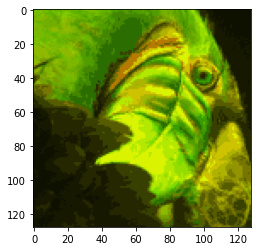

In [25]:
# Choosing fourty colors as K=40
K=40
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.40392157 0.6745098  0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.40392157 0.70196078 0.        ]
 [0.43529412 0.70196078 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.43137255 0.72941176 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.45490196 0.73333333 0.        ]
 [0.45490196 0.71764706 0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.43529412 0.6745098  0.        ]
 [0.45098039 0.70588235 0.        ]
 [0.44705882 0.6745098  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.45098039 0.72941176 0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.41176471 0.70588235 0.        ]
 [0.

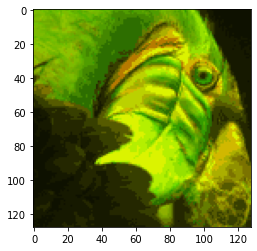

In [26]:
# Choosing sixty colors as K=60
K=60
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.45098039 0.70588235 0.        ]
 [0.43137255 0.70196078 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.43137255 0.71764706 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.45098039 0.71764706 0.        ]
 [0.43529412 0.73333333 0.        ]
 [0.45490196 0.7254902  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.41176471 0.7254902  0.        ]
 [0.45490196 0.6745098  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.73333333 0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.45098039 0.72941176 0.        ]
 [0.40392157 0.70588235 0.        ]
 [0.43529412 0.70588235 0.        ]
 [0.43529412 0.71764706 0.        ]
 [0.

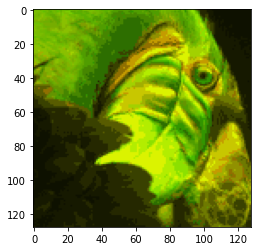

In [43]:
# Choosing sixty four colors as K=64
K=64
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

points.shape (16384, 3)
[[0.40392157 0.70196078 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.45098039 0.7254902  0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.71764706 0.        ]
 [0.45490196 0.70196078 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.43529412 0.70588235 0.        ]
 [0.41176471 0.6745098  0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.41176471 0.72941176 0.        ]
 [0.43137255 0.7254902  0.        ]
 [0.41176471 0.71764706 0.        ]
 [0.45098039 0.70196078 0.        ]
 [0.45098039 0.71764706 0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.70196078 0.        ]
 [0.44705882 0.6745098  0.        ]
 [0.40392157 0.72941176 0.        ]
 [0.44705882 0.7254902  0.        ]
 [0.41176471 0.73333333 0.        ]
 [0.43529412 0.7254902  0.        ]
 [0.40392157 0.7254902  0.        ]
 [0.40392157 0.6745098  0.        ]
 [0.45098039 0.73333333 0.        ]
 [0.

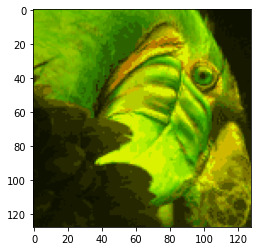

In [42]:
# Choosing seventy colors as K=70
K=70
points, centroids=initialize_random_centroids(img,K)
print(centroids)
centroids, cluserpoints = k_means(points, centroids, K)
image_compression(centroids, cluserpoints, img)

# Conclusion: 

The K-means clustering creates group of similar colors into 'k' clusters (say, k=70) of different colors (RGB values), resulting in each cluster centroid representing the color vector in RGB color space of its respective cluster. Perhaps, in the end, when K increases, the color stays mostly the same, allowing us to stop growing K early.